# Связные списки

Двусвязный список в Python – это связанная структура данных с набором последовательно связанных узлов. Каждый узел имеет три поля:
 - Data: хранит данные.

 - Prev: хранит адрес предыдущего узла.

 - Next: хранит адрес следующего узла.

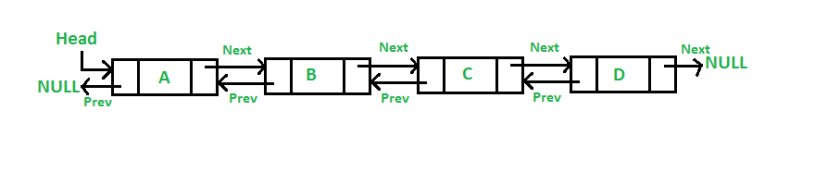

Двусвязные списки очень полезны там, где требуется двусторонняя навигация. Это позволяет обходить список в любом направлении. Двусвязный список требует изменения большего количества ссылок, чем односвязный список, при добавлении или удалении узлов. Но эти операции потенциально проще и эффективнее, так как не требуют отслеживания предыдущего узла, в отличие от односвязного списка.

In [1]:
class Node: 
    def __init__(self, data): 
        self.item = data 
        self.nref = None 
        self.pref = None
#{'item': data, nref: None, pref: None}


class DoublyLinkedList: 
    def __init__(self): 
        self.start_node = None

    def insert_in_emptylist(self, data): 
        if self.start_node is None: 
            new_node = Node(data) 
            self.start_node = new_node 
        else: 
            print("list is not empty")
            
    def insert_at_start(self, data): 
        if self.start_node is None: 
            new_node = Node(data) 
            self.start_node = new_node 
            print("node inserted") 
            return 
        new_node = Node(data) 
        new_node.nref = self.start_node 
        self.start_node.pref = new_node 
        self.start_node = new_node
        
    def insert_at_end(self, data): 
        if self.start_node is None: 
            new_node = Node(data) 
            self.start_node = new_node 
            return
        n = self.start_node 
        while n.nref is not None: 
            n = n.nref 
        new_node = Node(data) 
        n.nref = new_node 
        new_node.pref = n
            
    def insert_after_item(self, x, data): 
        if self.start_node is None: 
            print("List is empty") 
            return 
        else: 
            n = self.start_node 
            while n is not None: 
                if n.item == x: 
                    break 
                n = n.nref 
            if n is None: 
                print("item not in the list") 
            else: 
                new_node = Node(data) 
                new_node.pref = n 
                new_node.nref = n.nref 
                if n.nref is not None: 
                    n.nref.prev = new_node 
                n.nref = new_node
                
    def insert_before_item(self, x, data): 
        if self.start_node is None: 
            print("List is empty") 
            return 
        else: 
            n = self.start_node 
            while n is not None: 
                if n.item == x: 
                    break 
                n = n.nref 
            if n is None: 
                print("item not in the list") 
            else: 
                new_node = Node(data) 
                new_node.nref = n 
                new_node.pref = n.pref 
                if n.pref is not None: 
                    n.pref.nref = new_node 
                n.pref = new_node
                
    def traverse_list(self): 
        if self.start_node is None: 
            print("List has no element") 
            return 
        else: 
            n = self.start_node 
            while n is not None: 
                print(n.item , " ") 
                n = n.nref
                
    def delete_at_start(self): 
        if self.start_node is None: 
            print("The list has no element to delete") 
            return 
        if self.start_node.nref is None: 
            self.start_node = None 
            return 
        self.start_node = self.start_node.nref 
        self.start_node.pref = None
        
    def delete_at_end(self): 
        if self.start_node is None: 
            print("The list has no element to delete") 
            return 
        if self.start_node.nref is None: 
            self.start_node = None 
            return 
        n = self.start_node 
        while n.nref is not None: 
            n = n.nref 
        n.pref.nref = None
        
    def delete_element_by_value(self, x): 
        #check empty list
        if self.start_node is None: 
            print("The list has no element to delete") 
            return 
        #check if list is a single element
        if self.start_node.nref is None: 
            if self.start_node.item == x: 
                self.start_node = None 
            else: 
                print("Item not found")
                return 
        # list has > 1 element, and desirable elem is the first in the list
        # folllowing the delete_at_start() method
        if self.start_node.item == x: 
            self.start_node = self.start_node.nref 
            self.start_node.pref = None 
            return 
        # list is nonsingle-element and desirable elem is not the first
        n = self.start_node 
        while n.nref is not None: 
            if n.item == x: 
                break 
            n = n.nref 
        if n.nref is not None: 
            n.pref.nref = n.nref 
            n.nref.pref = n.pref 
        else: 
            if n.item == x: 
                n.pref.nref = None 
            else: 
                print("Element not found")
                
    def reverse_linked_list(self): 
        if self.start_node is None: 
            print("The list has no element to delete") 
            return 
        p = self.start_node 
        q = p.nref 
        p.nref = None 
        p.pref = q 
        while q is not None: 
            q.pref = q.nref 
            q.nref = p 
            p = q 
            q = q.pref 
        self.start_node = p

In [18]:
new_linked_list = DoublyLinkedList()
new_linked_list.insert_in_emptylist(50)
new_linked_list.traverse_list()

50  


In [19]:
new_linked_list.insert_at_start(10) 
new_linked_list.insert_at_start(5) 
new_linked_list.insert_at_start(18)

In [20]:
new_linked_list.traverse_list()

18  
5  
10  
50  


In [21]:
new_linked_list.insert_at_end(29) 
new_linked_list.insert_at_end(39) 
new_linked_list.insert_at_end(49)
new_linked_list.traverse_list()

18  
5  
10  
50  
29  
39  
49  


In [22]:
new_linked_list.insert_after_item(50, 65)
new_linked_list.traverse_list()

18  
5  
10  
50  
65  
29  
39  
49  


In [23]:
new_linked_list.insert_after_item(50, 50)
new_linked_list.traverse_list()

18  
5  
10  
50  
50  
65  
29  
39  
49  


In [24]:
new_linked_list.insert_after_item(50, 29)
new_linked_list.traverse_list()

18  
5  
10  
50  
29  
50  
65  
29  
39  
49  


In [25]:
new_linked_list.insert_before_item(29, 100)
new_linked_list.traverse_list()

18  
5  
10  
50  
100  
29  
50  
65  
29  
39  
49  


In [26]:
new_linked_list.delete_at_start()
new_linked_list.traverse_list()

5  
10  
50  
100  
29  
50  
65  
29  
39  
49  


In [27]:
new_linked_list.delete_at_end()
new_linked_list.traverse_list()

5  
10  
50  
100  
29  
50  
65  
29  
39  


In [28]:
new_linked_list.delete_element_by_value(65)
new_linked_list.traverse_list()

5  
10  
50  
29  
39  


In [29]:
new_linked_list.reverse_linked_list()
new_linked_list.traverse_list()

39  
29  
50  
10  
5  


## Задачи

1. Напишите программу для поиска определенного элемента (вводится с клавиатуры) в односвязном списке и возврата true, если элемент найден, в противном случае, возвращайте false.

2. Напишите функцию для вывода двусвязного списка в обратном порядке.

3. Есть односвязный список, в нем есть функции добавить элемент в произвольное место, удалить элемент по значению, распечатать список (для проверки правильности добавления и удаления), значения элементов списка ai целые числа, где i – итый элемент текущего списка. Для текущего состояния списка вычислить последовательность элементов ai – an, где n – последний элемент односвязного списка.

4. Напишите функцию для удаления заданного (вводится с клавиатуры) элемента двусвязного списка.

5. Для двухсвязного аналогично можно вычислить последовательность a_1 - a_n, a_2 - a_{n-1}, и так до середины списка.

6. Стек представляет собой список элементов, организованных по принципу LIFO (англ. last in — first out, «последним пришёл — первым вышел»). Пользователь может может добавить элементы в стек и получить доступ или удалить только недавно добавленные элементы в вершину стека. 

Для стека определены следуюшие операции:
* push() : добавляет элемент в стек и перемещает указатель на этот элемент стека.
* pop() : возвращает "верхний" (top) элемент и перемещает указатель на 2-й элемент стека.
* top() : возвращает "верхний" (top) элемент.
* size() : возвращает размер стека.
* isEmpty() : возвращает True если стек пуст, в противном случае возвращает False.
* printstack() : выводит на экран все элементы стека.

Реализуйте эти операции используя двусвязный список.